# Part I - Visualizing FordGoBike System Data
## by Ezemeka Chidera Miracle

## Introduction
> Ford GoBike is the Bay Area's bike share system. This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


# 1. Loading Libraries

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
import requests
import io

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


# 2. Gathering Data

This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

The data was downloaded from udacity server

In [2]:
dfbike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
dfbike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
dfbike.shape

(183412, 16)

In [5]:
dfbike['start_time'].unique()

array(['2019-02-28 17:32:10.1450', '2019-02-28 18:53:21.7890',
       '2019-02-28 12:13:13.2180', ..., '2019-02-01 00:06:05.5490',
       '2019-02-01 00:05:34.3600', '2019-02-01 00:00:20.6360'],
      dtype=object)

In [6]:
dfbike['end_time'].unique()

array(['2019-03-01 08:01:55.9750', '2019-03-01 06:42:03.0560',
       '2019-03-01 05:24:08.1460', ..., '2019-02-01 00:08:27.2200',
       '2019-02-01 00:07:54.2870', '2019-02-01 00:04:52.0580'],
      dtype=object)

In [7]:
dfbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [8]:
dfbike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
dfbike.duplicated().sum()

0

In [10]:
dfbike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Cleaning

There are some quality issues that need to be cleaned

- There are missing values (start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender)
- Start/end times are not in the timestamp format
- The (start_station_id, end_station_id, end_station_id, bike_id) columns are not in object format:

- Member birth year is in the float format, but should be converted to integer format
- Member birthdates have a few inaccurate values

In [11]:
# Save the original data set
dfbike_clean = dfbike.copy()

In [12]:
# Change the format to datetime
dfbike_clean.start_time = pd.to_datetime(dfbike_clean.start_time)
dfbike_clean.end_time = pd.to_datetime(dfbike_clean.end_time)

In [13]:
dfbike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [14]:
# Change the user_type, member_gender, and bike_share to category format
dfbike_clean.user_type = dfbike_clean.user_type.astype('category')
dfbike_clean.member_gender = dfbike_clean.member_gender.astype('category')
dfbike_clean.bike_share_for_all_trip = dfbike_clean.bike_share_for_all_trip.astype('category')

In [15]:
dfbike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [16]:
# Change bike_id, start_station_id, and end_station_id to object
dfbike_clean.bike_id = dfbike_clean.bike_id.astype(str)
dfbike_clean.start_station_id = dfbike_clean.start_station_id.astype(str)
dfbike_clean.end_station_id = dfbike_clean.end_station_id.astype(str)

In [17]:
dfbike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

---

### Calculate the actual age of the members at the time of the data collecton (2019)

In [18]:
dfbike_clean['member_age'] = 2019 - dfbike_clean['member_birth_year']

In [19]:
dfbike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0


In [20]:
dfbike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [21]:
dfbike_clean.member_age.describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

In [22]:
# It looks like 75% of the members are under 40 years old

In [23]:
# keep the events where riders were under 66 years of age
dfbike_clean = dfbike_clean.query('member_age <= 70')

In [24]:
# Convert the member_age and birth year to int format
dfbike_clean.member_age = dfbike_clean.member_age.astype(int)
dfbike_clean.member_birth_year = dfbike_clean.member_birth_year.astype(int)

In [25]:
dfbike_clean.member_age.describe()

count    174572.000000
mean         34.035739
std           9.712795
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          70.000000
Name: member_age, dtype: float64

Add Columns for 
- Duration in minutes
- start time weekday
- Start time month
- Start and end time hour

---

In [26]:
# Duration in seconds to duration in minutes
dfbike_clean['duration_min'] = dfbike_clean['duration_sec']/60
dfbike_clean['duration_min'] = dfbike_clean['duration_min'].astype(int)

In [27]:
# Create new column containing date name
dfbike_clean.insert(4, 'start_day', dfbike_clean['start_time'].dt.day_name())
dfbike_clean.insert(6, 'end_day', dfbike_clean['end_time'].dt.day_name())

In [28]:
dfbike_clean['start_time_weekday'] = dfbike_clean['start_time'].dt.strftime('%a')

In [29]:
dfbike_clean['start_time_weekday'].unique()

array(['Thu', 'Wed', 'Tue', 'Mon', 'Sun', 'Sat', 'Fri'], dtype=object)

---

In [30]:
dfbike_clean['start_time_hour'] = dfbike_clean['start_time'].dt.hour
dfbike_clean['end_time_hour'] = dfbike_clean['end_time'].dt.hour

In [31]:
dfbike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_day,start_station_name,end_day,start_station_latitude,start_station_longitude,end_station_id,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min,start_time_weekday,start_time_hour,end_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Thursday,Montgomery St BART Station (Market St at 2nd St),Friday,37.789625,-122.400811,13.0,...,4902,Customer,1984,Male,No,35,869,Thu,17,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Thursday,Market St at Dolores St,Friday,37.769305,-122.426826,3.0,...,5905,Customer,1972,Male,No,47,1030,Thu,12,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Thursday,Grove St at Masonic Ave,Friday,37.774836,-122.446546,70.0,...,6638,Subscriber,1989,Other,No,30,608,Thu,17,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Thursday,Frank H Ogawa Plaza,Friday,37.804562,-122.271738,222.0,...,4898,Subscriber,1974,Male,Yes,45,26,Thu,23,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,Thursday,4th St at Mission Bay Blvd S,Friday,37.770407,-122.391198,323.0,...,5200,Subscriber,1959,Male,No,60,29,Thu,23,0


# Store Data

In [32]:
dfbike_clean.to_csv('ford_bike_clean.csv', index = False)

### What is the structure of your dataset?

> The column headers are as follows;
- Trip Duration(seconds)
    - Start time and Date
    - End time and Date
    
- Start Station ID
    - Start Station Name
    - Start Station Latitude
    - Start Station Longitude
    
- End Station ID
    - End Station Name
    - End Station Latitude
    - End Station Longitude
    
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or  “Customer” = Casual)
    - Member Year of Birth
    - Member Gender

> I added the following columns in my cleaning efforts;
- Member Age
- Start Time Month
- Duration 
- Start Time Day of the Week
- Start time hour


### What is/are the main feature(s) of interest in your dataset?

> The main features i'm intrested in are data related to the start and end of the ride. It will help calculate when bikes are in high or low demand. Data such as age and gender with user types will be helpful in making certain business decisions such as which age group to target in marketing campaigns, or which day of the week bikes should be most available.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start and end times, age and gender, and related time-based information will be utilized heavily. I will use the customer related data, as well as the distance to understand the user-driven data behind each ride.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [33]:
# Removing the rainbow colors and setting to the variable no_color
no_color = sb.color_palette()[0]

In [34]:
dfbike_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_day', 'start_station_name', 'end_day', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'member_age', 'duration_min', 'start_time_weekday', 'start_time_hour',
       'end_time_hour'],
      dtype='object')

## QUESTION:

> What is the duration of the bike riders in minutes

In [35]:
dfbike_clean.duration_min.describe()

count    174572.000000
mean         11.249209
std          27.394822
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

In [36]:
dfbike_clean.duration_min.mean()

11.249209495222601

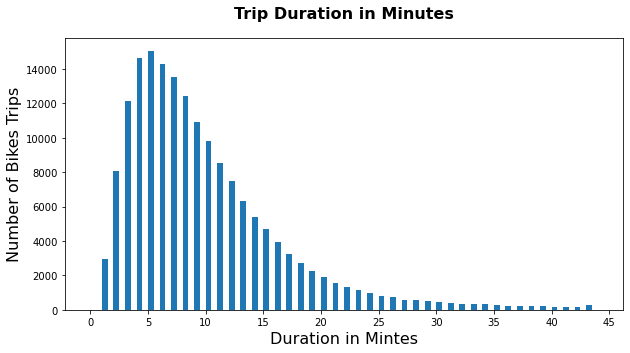

In [37]:
plt.figure(figsize = [10,5])
bins = np.arange(0,45,1)
ticks = [0,5,10,15,20,25,30,35,40,45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = dfbike_clean, x = 'duration_min', bins =  bins, width = 0.5);
plt.title("Trip Duration in Minutes", y =1.05, fontsize =16, fontweight = "bold")
plt.xlabel("Duration in Mintes", fontsize =16)
plt.xticks(ticks, labels)
plt.ylabel('Number of Bikes Trips', fontsize =16);

## Observation 

>The average trip is just under 11.5 minutes, with 75% of trips being under 13 minutes. Looking at the histogram, most rides fall in between the 3 - 12 minute range. This suggests riders are taking the bikes short distances.

## Question
How many bike trips started each day

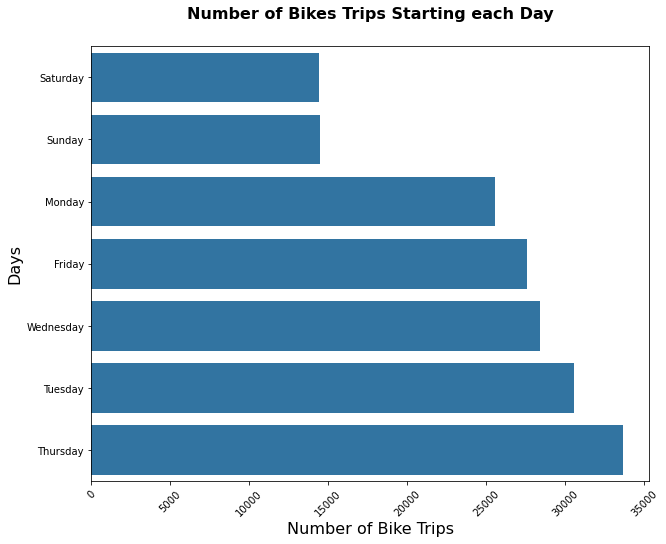

In [38]:
plt.figure(figsize=[10,8])
base_color = sb.color_palette()[0]
startDay_order = dfbike_clean['start_day'].value_counts(ascending = True).index
sb.countplot(data = dfbike_clean, y = 'start_day', color = base_color, order = startDay_order)
plt.title("Number of Bikes Trips Starting each Day", y = 1.05, fontsize =16, fontweight = "bold")
plt.ylabel("Days", fontsize =16)
plt.xlabel("Number of Bike Trips", fontsize =16)
plt.xticks(rotation = 45);

Most trips started on Thursday

In [39]:
dfbike_clean.end_day.value_counts()

Thursday     33624
Tuesday      30538
Wednesday    28369
Friday       27576
Monday       25582
Sunday       14475
Saturday     14408
Name: end_day, dtype: int64

## Question
How many bike trips ended each day

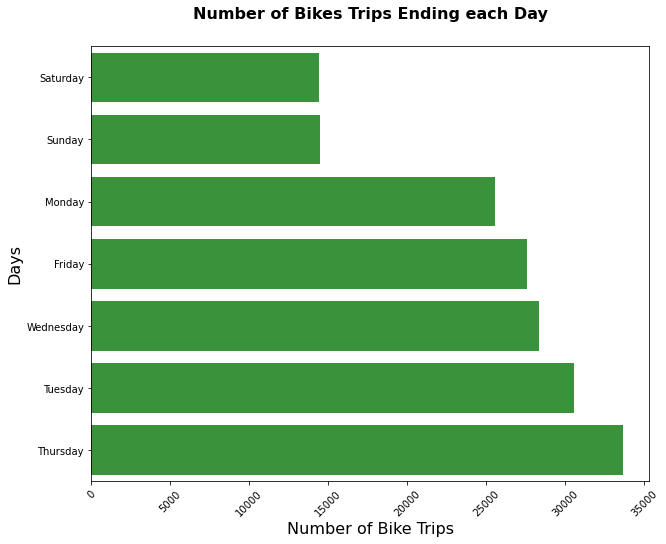

In [40]:
plt.figure(figsize=[10,8])
base_color = sb.color_palette()[2]
startDay_order = dfbike_clean['end_day'].value_counts(ascending = True).index
sb.countplot(data = dfbike_clean, y = 'end_day', color = base_color, order = startDay_order)
plt.title("Number of Bikes Trips Ending each Day", y = 1.05, fontsize =16, fontweight = "bold")
plt.ylabel("Days", fontsize =16)
plt.xlabel("Number of Bike Trips", fontsize =16)
plt.xticks(rotation = 45);

## Observation
Most trips ended on Thursday

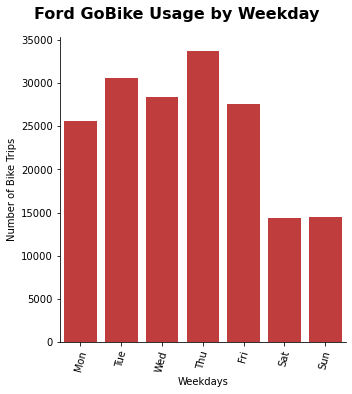

In [41]:
# Weekday usage of the Ford Go bike system
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
base_color = sb.color_palette()[3]
graph = sb.catplot(data=dfbike_clean, x='start_time_weekday', kind='count', color = base_color, order = weekday)

graph.set_axis_labels('Weekdays', 'Number of Bike Trips')

graph.fig.suptitle('Ford GoBike Usage by Weekday', y=1.05, fontsize=16, fontweight='bold');

graph.set_xticklabels(rotation=75);

## Observation

>Tuesdays and Thursday seem to be the most popular days for using the bike sharing system, however Wednesday and Friday seems to be nearly equall. The usage drops significantly on Saturdays and Sundays suggesting the Ford bike share system is used primarily for commuting purposes during working days.

## Question 
Duration of the bike rides - in SECONDS

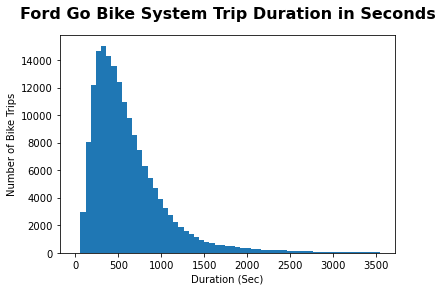

In [42]:
# Duration of the bike rides - in SECONDS
bin_edges = np.arange(0, 3600, 60)

plt.hist(data = dfbike_clean, x = 'duration_sec', bins = bin_edges);

plt.title("Ford Go Bike System Trip Duration in Seconds", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of Bike Trips');

The histogram is skewed to the right which shows that people used it for basically short period of time

In [43]:
dfbike_clean.member_age.describe()

count    174572.000000
mean         34.035739
std           9.712795
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          70.000000
Name: member_age, dtype: float64

In [44]:
dfbike_clean.member_age.max()

70

In [45]:
dfbike_clean.member_age.mean()

34.035738835552095

## Question 
What age group does majority of the user form

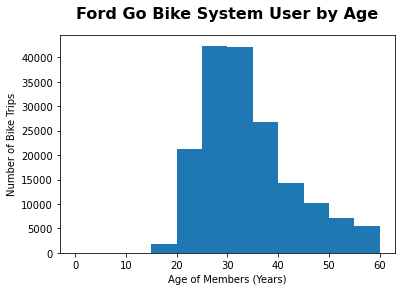

In [46]:
# Age group data
bin_edges = np.arange(0, 65, 5)

plt.hist(data = dfbike_clean, x = 'member_age', bins = bin_edges);

plt.title("Ford Go Bike System User by Age", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Age of Members (Years)')
plt.ylabel('Number of Bike Trips');

## Observation 

>The mean age of a user is 34 years old. As a reminder, in the cleaning portion of this data set all users under the age of 70 were removed. The histogram shows the majority of users fall between the ages of 25 - 40 years, which is also the same age range of working adults.

## Question
What is the usuage with respect to gender

In [47]:
# Usage by females, males, and other
gender = dfbike_clean.member_gender.value_counts()
gender

Male      130176
Female     40772
Other       3624
Name: member_gender, dtype: int64

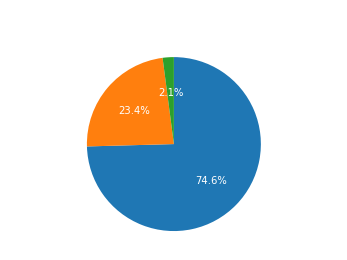

In [48]:
plt.pie(gender, labels = gender.index, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'white'});
#plt.axis('square');
plt.title('Ford Go Bike System User by Gender', y=1.05, fontsize=16, fontweight='bold', color = 'white');

## Observation 

>The visual above demonstrates the overwhelming majority of users of the bike share system are male, representing 74.6% of the total users.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Oweing to our cleaning efforts there were no big surprises during the exploratory and visualization.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Nothing seems out of the normal expectations for a bike sharing system in a major city. So far, the data reveals that adults in the average working age range are the primary user base for the system, and they use the bikes on their daily commutes.

# Bivariant 

> In this section, I investigate relationships between pairs of variables in the data.

In [49]:
dfbike_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_day', 'start_station_name', 'end_day', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'member_age', 'duration_min', 'start_time_weekday', 'start_time_hour',
       'end_time_hour'],
      dtype='object')

## Question
What is the duration per user types

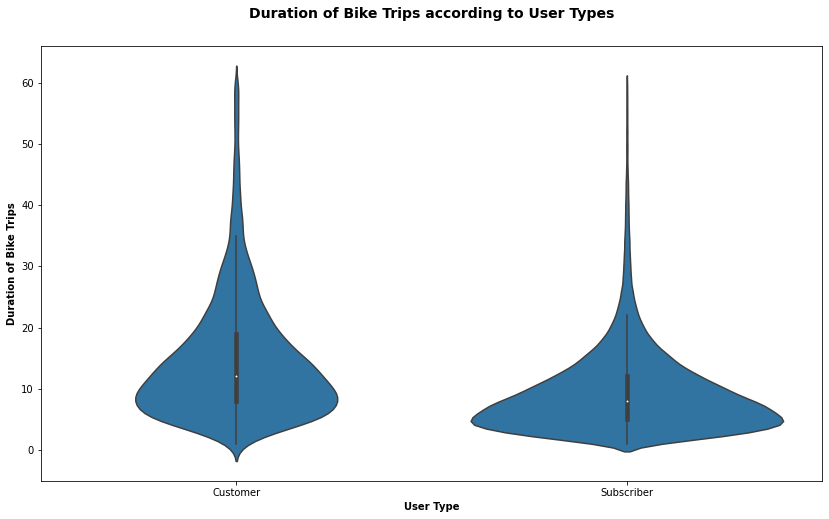

In [50]:
#Does trip duration depend on user type?
plt.figure(figsize = [14,8])
sb.violinplot(data = dfbike_clean.query("duration_min <= 60"), x ='user_type', y = 'duration_min', color =sb.color_palette()[0])
plt.title('Duration of Bike Trips according to User Types', y = 1.05, fontsize = 14, fontweight = "bold")
plt.xlabel('User Type', fontweight = 'bold')
plt.ylabel('Duration of Bike Trips', fontweight = 'bold');
              


## Observations
At durations less than or equal to 60 minutes both users have achieved similar durations of use

## Questions
What is the size of customers to subscribers

In [51]:
# Customers vs Subscribers
customer = dfbike_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = dfbike_clean.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / dfbike_clean['bike_id'].count()
subscriber_prop = subscriber / dfbike_clean['bike_id'].count()

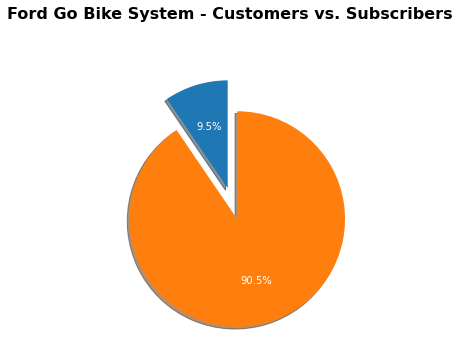

In [52]:
# Customers vs Subscribers Visuals
# pie chart
plt.figure(figsize = [8, 5])

labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
explode = (0, 0.3)

plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'white'})
plt.axis('equal')

plt.suptitle('Ford Go Bike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

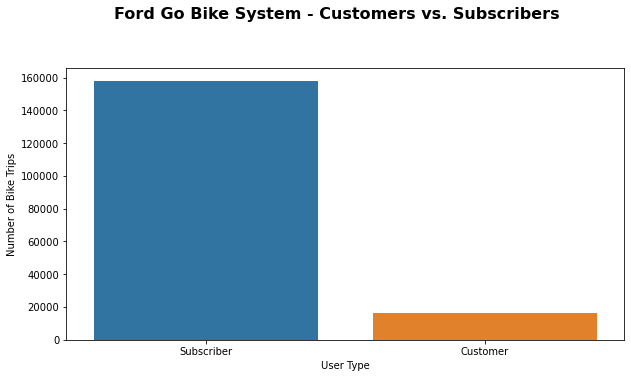

In [53]:
# Customers vs Subscribers Visuals
# bar chart
plt.figure(figsize = [10, 5])

graph = sb.countplot(data = dfbike_clean, x = "user_type", order = dfbike_clean.user_type.value_counts().index);
graph.set_xlabel('User Type');
graph.set_ylabel('Number of Bike Trips');
plt.suptitle('Ford Go Bike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

## Observation

>The majority of users for the Ford Go Bike System are Subscribers i.e. customers who subscribe to the monthly membership.

## Question
Display customers usuage to subscribers usage

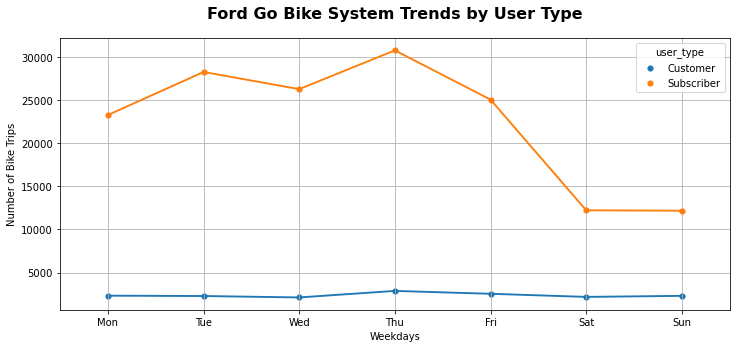

In [54]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))

dfbike_clean_user_week = dfbike_clean.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=dfbike_clean_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford Go Bike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

## Observation

>The point plot above is showing the sharp contrast between Customers and Subscribers. Customers have a relatively low usage of the bike share system with a small increase on the weekends. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend.

## Question
Visualize customers usage by duration

## Question
Visualize subscribers by duration

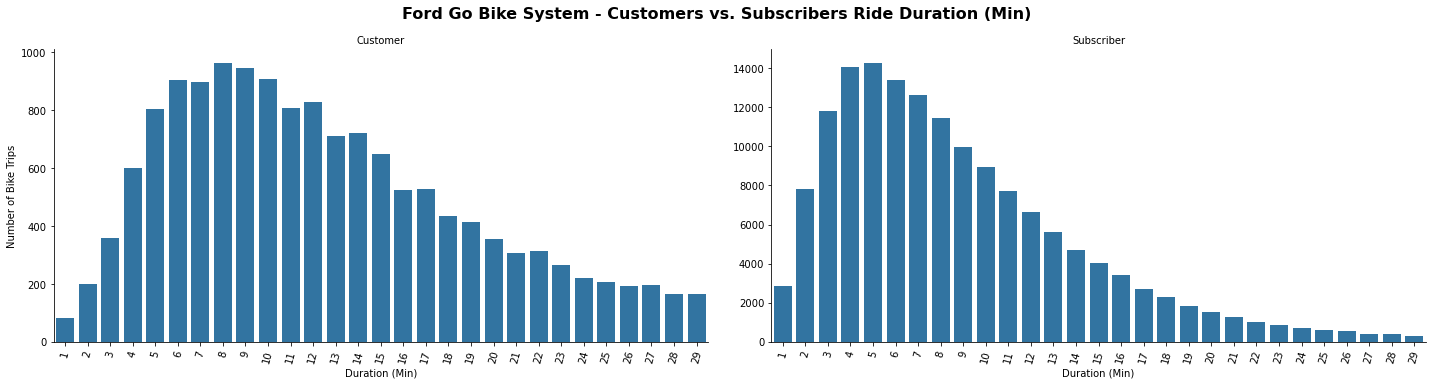

In [55]:
# Customer Usage by Duration vs. Subscriber Usage by Duration

data = dfbike_clean.query('duration_min < 30')

graph = sb.catplot(data=data, x = 'duration_min', col='user_type', kind='count', sharey = False, color = no_color, height=5, aspect=2);

graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford Go Bike System - Customers vs. Subscribers Ride Duration (Min)', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

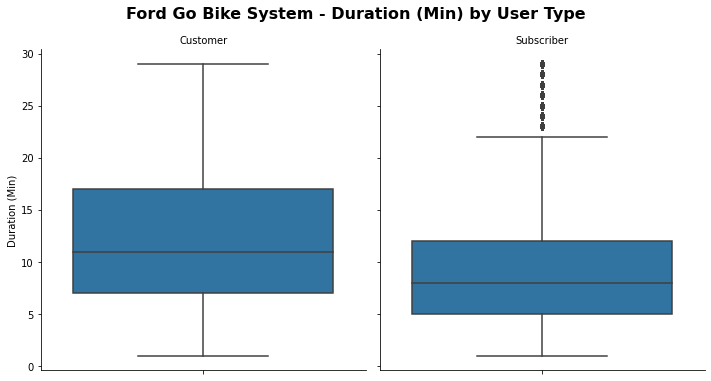

In [56]:
data = dfbike_clean.query('duration_min < 30')

g = sb.catplot(data=data, y='duration_min', col="user_type", kind='box', color = no_color)

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Ford Go Bike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');

## Observation 

>The plots above show the ride duration spread in minutes (note the y-axis isn't shared between the Customer and Subscriber graphs in order to visualize trends easier). Customer typically have trip durations are longer (8 to 18 minutes according to the box plot) than for subscribers (5 to 12 minutes according to the box plot). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips.

## Question
Display customers usuage with respect to age group

## Question 
Visualize subscribers usage with respect to age group

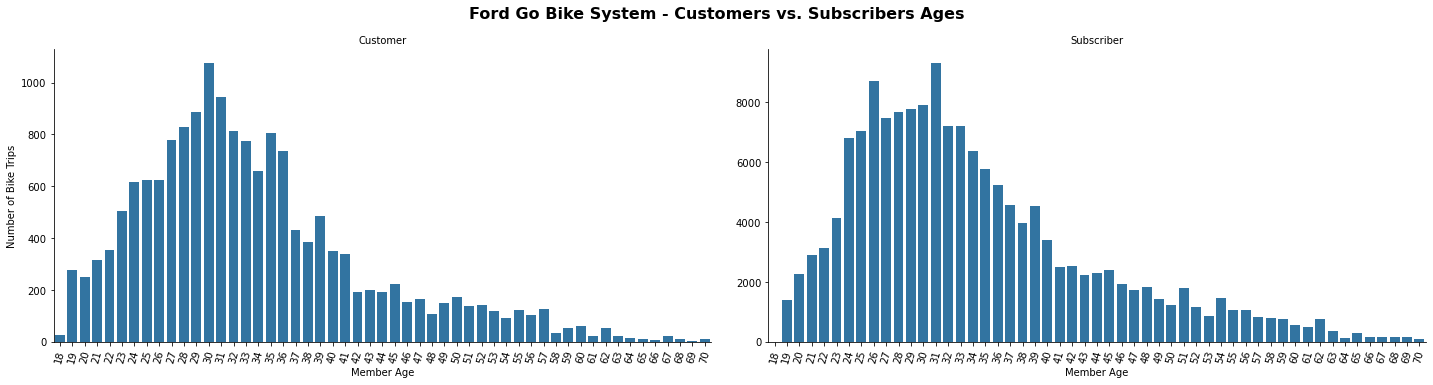

In [57]:
# # Customer vs. Subscriber Usage by Age
graph = sb.catplot(data = dfbike_clean, x = 'member_age', col='user_type', kind='count', sharey = False, color = no_color, height=5, aspect=2)

graph.set_axis_labels('Member Age', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford Go Bike System - Customers vs. Subscribers Ages', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

## Observation 

>(Note the y-axis isn't shared between the Customer and Subscriber graphs in order to visualize trends easier). 
The customer graph has high number of 30 years old while the Subscribers has high number of 31 years old.Subscribers have a wider range of ages while Customers tends to have mostly younger users (most are und the 30 threshold) while the Subscriber user group is more spread out between varying ages with plenty of users in their mid-fifities.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Adding the user type to the analysis revealed different behavior usage between customers and subscribers. The customers are casual riders such as tourists, or students on a school vacation or holiday. This is accurate when factoring in that Customer usage increases on the weekends, and peaks during the month of July. In contrast, the data suggests Subscribers are daily commuters or full time students who use the system during weekdays, better weather, and mostly for shorter distances. They mainly rent bikes before and after a typical work or school day (8-9am and 5-6pm).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, which may be for longer trips around the surrounding area. Subscribers use the system mainly for commute purposes so they prefer quick, short rides to and from work.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [58]:
dfbike_clean['age_bins'] = dfbike_clean['member_age'].apply(lambda x: '15 - 25' if 15<x<=25
                                                  else '26 - 35' if 25<x<=35
                                                  else '36 - 45' if 35<x<=45
                                                  else '46 - 55' if 45<x<=55
                                                  else '56 - 66' if 55<x<=66
                                                       else x)
dfbike_clean.age_bins.value_counts()

26 - 35    83520
36 - 45    37202
15 - 25    30652
46 - 55    15884
56 - 66     6668
67           189
68           180
69           178
70            99
Name: age_bins, dtype: int64

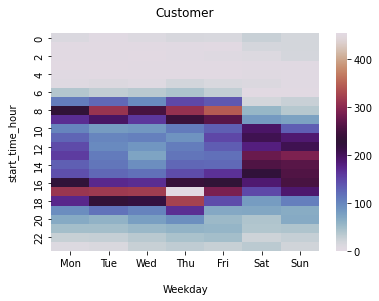

In [59]:
# Weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dfbike_clean['start_time_weekday'] = pd.Categorical(dfbike_clean['start_time_weekday'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

#plt.figure(figsize=(15,8))

# Heatmap - Customers
#plt.subplot(1, 2, 1)
df_customer = dfbike_clean.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('start_time_hour', 'start_time_weekday', 'bike_id')

heat_map = sb.heatmap(df_customer, cmap = 'twilight')

plt.title('Customer', y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('start_time_hour',  labelpad = 16)

plt.show()


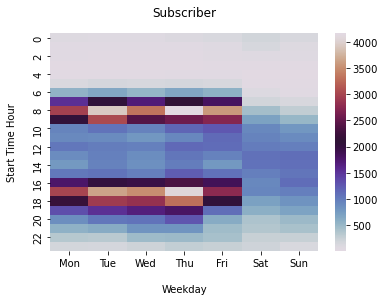

In [60]:
# Heatmap - Subscribers
#plt.subplot(1, 2, 2)
df_subscriber = dfbike_clean.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
hot_map = sb.heatmap(df_subscriber, cmap = 'twilight')

plt.title("Subscriber", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);

plt.show()

Customers use the bike sharing system more often on weekends, whilte Subscribers primarily use the bikes on weekdays.

During weekdays, most bike rides occur between 4-6pm, peaking on Fridays around 5pm. During weeknds, most bike rides occur between 11am and 6pm, peaking on Saturdays around 2pm.

During weekdays, most bike rides occur around 8-9am and 4-6pm. During weekends, there is a significant drop in the number of rented bikes.

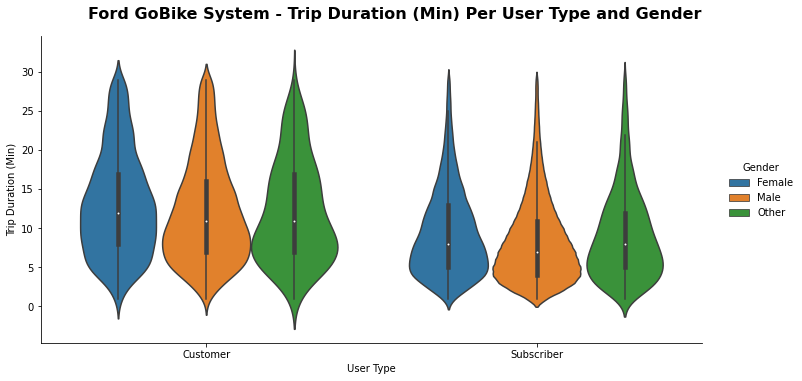

In [61]:
# Violinplot - duration (min) per user type and gender

graph = sb.catplot(data=data, x='user_type', y="duration_min", hue="member_gender", kind="violin", height=5, aspect=2);

graph.set_axis_labels("User Type", "Trip Duration (Min)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Ford GoBike System - Trip Duration (Min) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

In both cases, females take longer trips (measured in time) than males and other genders. The difference is more visible for customers (~13 min for males and other vs ~15 for females) than for subscribers (the difference is quite small).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> This part of the project explains exploration through different visuals and adding in more variables to compare to other variables. Subscribers vs customer age was explored through the use of age groups and a pointplot to demonstrate the varing habits of each age group. The heatmap didn't reveal anything new for the time based discussion on when and what time each user group uses the bike sharing system. As previously noted, Customers use the system at almost the opposite time as the Subscribers.

### Were there any interesting or surprising interactions between features?

> Nothing out of the expected here.

## Conclusions
> It is a win - win situation, a large number of people can benefit from this program:
- Subscribers(i.e. daily commuters) benefit from a health commuting choice
- Customers have a sustainable yet flexible option for touring th city.
- Budget friendly, and environmentally friendly
- Convenient transportation for the people of all socioeconomic classes
